In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
in1 = open("dchsq_DUNE_bestfit_epset1e-2_NHtrue_phiet0_NSI_IHtest_NSI.dat", "r")
in2 = open("dchsq_DUNE_bestfit_epset1e-2_NHtrue_SI_IHtest_NSI.dat", "r")
in3 = open("dchsq_DUNE_bestfit_epset1e-2_NHtrue_phietrange_SI_IHtest_NSI.dat", "r")

In [53]:
def separate_e_p(file):
    e = []
    p = []
    for line in file:
        line = line.replace("\n", "")
        line = line.split(" ")
        if len(line) == 1:
            continue
        e.append(float(line[0]))
        p.append(float(line[1]))
    file.close()
    return e, p

In [54]:
def separate_e_p3(file):
    e = []
    p1 = []
    p2 = []
    for line in file:
        line = line.replace("\n", "")
        line = line.split(" ")
        if len(line) == 1:
            continue
        e.append(float(line[0]))
        p1.append(float(line[1]))
        p2.append(float(line[2]))
    file.close()
    return e, p1, p2

In [55]:
e1, p1 = separate_e_p(in1)
e2, p2 = separate_e_p(in2)
e3, p3, p4 = separate_e_p3(in3)

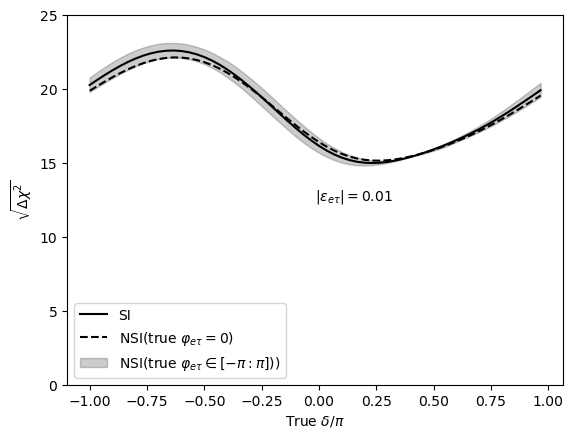

In [56]:
plt.plot(np.divide(e2, np.pi), np.sqrt(p2), label="SI", color="black")
plt.plot(np.divide(e1, np.pi), np.sqrt(p1), label=r"NSI(true $\varphi_{e\tau}=0$)", color="black", linestyle="--")
plt.fill_between(np.divide(e3, np.pi), np.sqrt(p3), np.sqrt(p4), alpha=0.2, label=r"NSI(true $\varphi_{e\tau}\in[-\pi:\pi])$)", color="black")
plt.ylabel(r"$\sqrt{\Delta \chi^2}$")
plt.xlabel(r"True $\delta / \pi$")
plt.text(0.5, 0.5, r"$|\epsilon_{e\tau}|=0.01$", transform=plt.gca().transAxes)
plt.ylim(0, 25)
plt.legend()
plt.savefig("dchsq_bestfit_NH_DUNE_epset1e-2_IHtest_NSI.pdf")